In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

import os

2.0.0


In [2]:
path = './datasets/brats2015_training_crop_mri.tfrecords'

In [3]:
dataset = tf.data.TFRecordDataset(path, compression_type='GZIP')

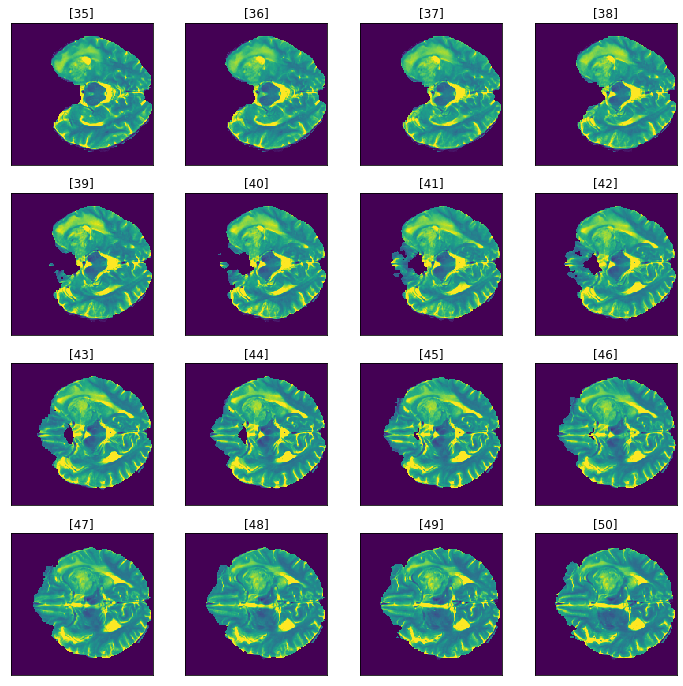

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1 , figsize = (12 , 12))
i = 0
n = 0
size = 50

for raw_record in dataset.take(size):
    #print(dict(example.features.feature).keys())
    #print(dict(example.features.feature).values())
    i += 1 
    if (i >= (size-15)):
        example = tf.train.Example()
        example.ParseFromString(raw_record.numpy())
        string = example.features.feature['MR_T2_mri'].bytes_list.value[0]
        output = np.frombuffer(string, dtype=np.float32)
        test = np.reshape(output, (180, 180))
        
        n += 1
        plt.subplot(4 , 4 , n)
        plt.imshow(test)
        plt.title('[{}]'.format(i))
        plt.xticks([]) , plt.yticks([])

In [129]:
for raw_record in dataset.take(1):
    example = tf.train.Example()
    t = example.ParseFromString(raw_record.numpy())
    
    print(dict(example.features.feature).keys())
    #print(dict(example.features.feature).values(0))
    #string = example.features.feature['MR_T2_mri_type'].values
    #string

dict_keys(['OT_z_dimension_src', 'MR_T1c_location', 'MR_T2_patient_grade', 'OT_patient_mri_seq', 'MR_T1_slice_lperc', 'MR_T2_patient', 'MR_T2_z_dimension_src', 'OT_y_origin_src', 'MR_T1_y_spacing_src', 'MR_T2_patient_mri_seq', 'MR_Flair_x_spacing_src', 'MR_T2_z_origin_src', 'MR_T1c_slice_min', 'MR_Flair_patient', 'MR_T1_mri_lperc_src', 'MR_Flair_mri', 'OT_mri_type', 'MR_T1c_mri_hperc_src', 'MR_T1_dataset_version', 'OT_z_dimension', 'OT_y_dimension_src', 'MR_T1_patient_grade', 'OT_y_dimension', 'MR_T2_y_dimension_src', 'MR_T2_location', 'OT_y_spacing_src', 'MR_T1_patient', 'OT_mri_lperc', 'OT_x_dimension', 'MR_T1_mri_min_src', 'OT_x_origin_src', 'MR_Flair_sample_number', 'OT_mri_lperc_src', 'OT_x_dimension_src', 'MR_T2_y_origin_src', 'MR_T1c_mri_type', 'MR_T1c_patient', 'MR_T2_x_dimension_src', 'OT_patient_grade', 'MR_T1c_path', 'MR_Flair_z_dimension', 'MR_T2_mri_max_src', 'MR_T1c_z_dimension', 'MR_T1c_x_spacing_src', 'MR_T2_mri_max', 'MR_Flair_y_dimension', 'MR_T1_slice_hperc', 'MR_T1c

In [128]:
raw_record

<tf.Tensor: id=8938, shape=(), dtype=string, numpy=b'\n\xc2\xf6\'\n\x1c\n\x10OT_y_spacing_src\x12\x08\x12\x06\n\x04\x00\x00\x80?\n\x1b\n\rMR_T1_patient\x12\n\n\x08\n\x06pat117\n\x18\n\x0cOT_mri_lperc\x12\x08\x12\x06\n\x04\x00\x00\x00\x00\n\x18\n\x0eOT_x_dimension\x12\x06\x1a\x04\n\x02\xb4\x01\n\x1d\n\x11MR_T1_mri_min_src\x12\x08\x12\x06\n\x04\x00\x00\x00\x00\n\x1b\n\x0fOT_x_origin_src\x12\x08\x12\x06\n\x04\x00\x00\x00\x00\n#\n\x16MR_Flair_sample_number\x12\t\n\x07\n\x0535541\n\x1e\n\x12MR_T2_y_origin_src\x12\x08\x12\x06\n\x04\x00\x00o\xc3\n\x1c\n\x12OT_x_dimension_src\x12\x06\x1a\x04\n\x02\xf0\x01\n\x1c\n\x10OT_mri_lperc_src\x12\x08\x12\x06\n\x04\x00\x00\x00\x00\n\x1d\n\x0fMR_T1c_mri_type\x12\n\n\x08\n\x06MR_T1c\n\x1c\n\x0eMR_T1c_patient\x12\n\n\x08\n\x06pat117\n\x1f\n\x15MR_T2_x_dimension_src\x12\x06\x1a\x04\n\x02\xf0\x01\n\x1c\n\x10OT_patient_grade\x12\x08\n\x06\n\x04HIGH\n\x98\x01\n\x0bMR_T1c_path\x12\x88\x01\n\x85\x01\n\x82\x01../../datasets/BRATS2015/BRATS2015_Training/HGG/brats_t

In [84]:
a = example.features.feature['MR_T2_x_dimension']
b = example.features.feature['MR_T2_y_dimension']
c = example.features.feature['MR_T2_z_dimension']
a,b,c

d = example.features.feature['MR_T2_x_dimension_src']
e = example.features.feature['MR_T2_y_dimension_src']
f = example.features.feature['MR_T2_z_dimension_src']
a,b,c,d,e,f

(int64_list {
   value: 180
 }, int64_list {
   value: 180
 }, int64_list {
   value: 128
 }, int64_list {
   value: 240
 }, int64_list {
   value: 240
 }, int64_list {
   value: 155
 })

In [281]:
a = example.features.feature['MR_T2_x_origin_src']
b = example.features.feature['MR_T2_y_origin_src']
c = example.features.feature['MR_T2_z_origin_src']
a,b,c

d = example.features.feature['MR_T2_x_spacing_src']
e = example.features.feature['MR_T2_y_spacing_src']
f = example.features.feature['MR_T2_z_spacing_src']
a,b,c,d,e,f

(float_list {
   value: 0.0
 }, float_list {
   value: -239.0
 }, float_list {
   value: 0.0
 }, float_list {
   value: 1.0
 }, float_list {
   value: 1.0
 }, float_list {
   value: 1.0
 })

In [282]:
a = example.features.feature['MR_T2_mri_min']
b = example.features.feature['MR_T2_mri_max']
c = example.features.feature['MR_T2_mri_min_src']
d = example.features.feature['MR_T2_mri_max_src']
a,b,c,d

e = example.features.feature['MR_T2_mri_lperc']
f = example.features.feature['MR_T2_mri_hperc']
g = example.features.feature['MR_T2_mri_hperc_src']
h = example.features.feature['MR_T2_mri_lperc_src']
a,b,c,d,e,f,g,h

(float_list {
   value: 0.0
 }, float_list {
   value: 1.0
 }, float_list {
   value: 0.0
 }, float_list {
   value: 2648.0
 }, float_list {
   value: 0.0
 }, float_list {
   value: 1.0
 }, float_list {
   value: 1013.0
 }, float_list {
   value: 0.0
 })

In [53]:
for raw_record in dataset.take(1):
    print(repr(raw_record))

<tf.Tensor: id=2281, shape=(), dtype=string, numpy=b'\n\xc2\xf6\'\n \n\x14MR_Flair_slice_hperc\x12\x08\x12\x06\n\x04\xafD=?\n\x1e\n\x12MR_T1c_slice_hperc\x12\x08\x12\x06\n\x04\xe8+P?\n \n\x14MR_T1c_z_spacing_src\x12\x08\x12\x06\n\x04\x00\x00\x80?\n\x1b\n\x0fOT_z_origin_src\x12\x08\x12\x06\n\x04\x00\x00\x00\x00\n\x1e\n\x0bOT_location\x12\x0f\n\r\n\x0bBrain_3more\n"\n\x16MR_Flair_mri_hperc_src\x12\x08\x12\x06\n\x04\x00\x00\x10D\n\x1d\n\x11MR_T1_mri_max_src\x12\x08\x12\x06\n\x04\x00\xe0\xa0D\n\x1b\n\x0eMR_T1_mri_type\x12\t\n\x07\n\x05MR_T1\n\x1b\n\x11MR_T2_z_dimension\x12\x06\x1a\x04\n\x02\x80\x01\n\x9e\x01\n\rMR_Flair_path\x12\x8c\x01\n\x89\x01\n\x86\x01../../datasets/BRATS2015/BRATS2015_Training/HGG/brats_tcia_pat105_0001/VSD.Brain.XX.O.MR_Flair.35533/VSD.Brain.XX.O.MR_Flair.35533.mha\n\x1c\n\x10MR_T1c_slice_max\x12\x08\x12\x06\n\x04\x00\x00\x80?\n\x1f\n\x13MR_T2_y_spacing_src\x12\x08\x12\x06\n\x04\x00\x00\x80?\n\x95\x01\n\nMR_T2_path\x12\x86\x01\n\x83\x01\n\x80\x01../../datasets/BRATS2

In [12]:
def get_feature_description(modalities):                                                   
                                                                                           
    feature_description =lambda mod : {                                                    
                            mod+'_mri': tf.io.FixedLenFeature([], tf.string),              
                            mod+'_path': tf.io.FixedLenFeature([], tf.string),             
                                                                                           
                            mod+'_mri_min': tf.io.FixedLenFeature([], tf.float32),         
                            mod+'_mri_min_src': tf.io.FixedLenFeature([], tf.float32),     
                            mod+'_mri_max': tf.io.FixedLenFeature([], tf.float32),         
                            mod+'_mri_max_src': tf.io.FixedLenFeature([], tf.float32),     
                                                                                           
                            mod+'_mri_lperc': tf.io.FixedLenFeature([], tf.float32),       
                            mod+'_mri_hperc': tf.io.FixedLenFeature([], tf.float32),       
                            mod+'_mri_hperc_src': tf.io.FixedLenFeature([], tf.float32),   
                            mod+'_mri_lperc_src': tf.io.FixedLenFeature([], tf.float32),   
                                                                                           
                            mod+'_x_dimension': tf.io.FixedLenFeature([], tf.int64),       
                            mod+'_y_dimension': tf.io.FixedLenFeature([], tf.int64),       
                            mod+'_z_dimension': tf.io.FixedLenFeature([], tf.int64),       
                            mod+'_z_dimension_src': tf.io.FixedLenFeature([], tf.int64),   
                            mod+'_x_dimension_src': tf.io.FixedLenFeature([], tf.int64),   
                            mod+'_y_dimension_src': tf.io.FixedLenFeature([], tf.int64),   
                                                                                           
                            mod+'_x_origin_src': tf.io.FixedLenFeature([], tf.float32),    
                            mod+'_y_origin_src': tf.io.FixedLenFeature([], tf.float32),    
                            mod+'_z_origin_src': tf.io.FixedLenFeature([], tf.float32),    
                                                                                           
                            mod+'_z_spacing_src': tf.io.FixedLenFeature([], tf.float32),   
                            mod+'_x_spacing_src': tf.io.FixedLenFeature([], tf.float32),   
                            mod+'_y_spacing_src': tf.io.FixedLenFeature([], tf.float32),   
                                                                                           
                            mod+'_patient': tf.io.FixedLenFeature([], tf.string),          
                            mod+'_sample_number': tf.io.FixedLenFeature([], tf.string),    
                            mod+'_patient_grade': tf.io.FixedLenFeature([], tf.string),    
                            mod+'_location': tf.io.FixedLenFeature([], tf.string),         
                            mod+'_dataset_version': tf.io.FixedLenFeature([], tf.string),  
                            mod+'_dataset_name': tf.io.FixedLenFeature([], tf.string),     
                            mod+'_mri_type': tf.io.FixedLenFeature([], tf.string),         
                            mod+'_dataset_split': tf.io.FixedLenFeature([], tf.string),    
                            mod+'_patient_mri_seq': tf.io.FixedLenFeature([], tf.string),  
                          }                                                                
    features = {}                                                                          
    for mod in modalities:  
        print(mod)
        features.update(feature_description(mod))
    return features

In [38]:
use_gzip_compression = True

def load_dataset(name, mri_type, center_crop=None, random_crop=None, filter=None, batch_size=32, cache=True, 
                 prefetch_buffer=1, shuffle_buffer=128, interleave=1, cast_to=tf.float32, clip_labels_to=0.0, 
                 take_only=None, shuffle=True, infinite=False, n_threads=os.cpu_count()):
    def parse_sample(sample_proto):
        print("I'm here")
        parsed = tf.io.parse_single_example(sample_proto, get_feature_description(["OT"]+mri_type))
        # Decoding image arrays
        
        slice_shape = [parsed['OT_x_dimension'.format(mri_type[0])], parsed['OT_y_dimension'], 1]
        # Decoding the ground truth
        parsed['seg'] = tf.cast(tf.reshape(tf.io.decode_raw(parsed['OT_mri'], tf.float32), shape=slice_shape), dtype=cast_to)
        # Decode each channel and stack in a 3d volume
        stacked_mri = list()
        for mod in mri_type:
            stacked_mri.append(tf.cast(tf.reshape(tf.io.decode_raw(parsed['{}_mri'.format(mod)], tf.float32), shape=slice_shape), dtype=cast_to))
        parsed['mri'] = tf.concat(stacked_mri, axis=-1)
        # Clipping the labels if requested
        parsed['seg'] = tf.clip_by_value(parsed['seg'], 0.0, clip_labels_to) if clip_labels_to else parsed['seg']
        
        # Cropping
        if random_crop or center_crop:
            # Stacking the mri and the label to align the crop shape
            mri_seg = tf.concat([parsed['mri'], parsed['seg']], axis=-1)
            if random_crop:
                random_crop[-1] = mri_seg.shape[-1] 
                cropped = tf.image.random_crop(mri_seg, size=random_crop)
            else:
                cropped = tf.image.resize_with_crop_or_pad(mri_seg,center_crop[0],center_crop[1])
            # Splitting back
            parsed['mri'] = cropped[:,:,:len(mri_type)]
            parsed['seg'] = cropped[:,:,len(mri_type):]
        
        return parsed
    
    
    path = '../datasets/{}.tfrecords'.format(name)
    dataset = tf.data.TFRecordDataset(path, compression_type='GZIP' if use_gzip_compression else "")
    dataset = dataset.filter(filter) if filter is not None else dataset
    dataset = dataset.take(take_only) if take_only is not None else dataset
    
    if shuffle and infinite:
        dataset = dataset.apply(tf.data.experimental.shuffle_and_repeat(shuffle_buffer))
    else:
        dataset = dataset.shuffle(shuffle_buffer, reshuffle_each_iteration=True) if shuffle else dataset
        dataset = dataset.repeat() if infinite else dataset
    dataset = dataset.map(parse_sample, num_parallel_calls=None)
    dataset = dataset.batch(batch_size) if batch_size > 0 else dataset
    dataset = dataset.cache() if cache else dataset
    print(tf.data.experimental.AUTOTUNE)
    
    #print(type(parsed_image_dataset))
    #for image_features in parsed_image_dataset:
    #    image_raw = image_features['image_raw'].numpy()
    #    print("Enter here")
    #    display.display(display.Image(data=image_raw))
    
    if interleave > 1:
        dataset = dataset.interleave(lambda x: tf.data.Dataset.from_tensors(x).repeat(interleave), cycle_length=n_threads, block_length=interleave, num_parallel_calls=n_threads)
        
        
    # Number of elements to prefetch should be equal to (or possibly greater than) the number of batches 
    # consumed by a single training step. You could either manually tune this value, or set it to 
    # tf.data.experimental.AUTOTUNE which will prompt the tf.data runtime to tune the value dynamically at runtime   
    
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset


In [39]:
os.listdir('./datasets')

['brats2015_testing_crop_mri.tfrecords',
 'dataset_helpers.py',
 'brats2015_validation_crop_mri.tfrecords',
 'brats2015_training_crop_mri.tfrecords']

In [40]:
validation = load_dataset('brats2015_validation_crop_mri', ['MR_T1', 'MR_T2', 'MR_T1c', 'MR_Flair'])
#training = load_dataset('brats2015_training_crop_mri', ['MR_T1', 'MR_T2', 'MR_T1c', 'MR_Flair'])
#testing = load_dataset('brats2015_testing_crop_mri', ['MR_T1', 'MR_T2', 'MR_T1c', 'MR_Flair'])

I'm here
OT
MR_T1
MR_T2
MR_T1c
MR_Flair
-1


In [41]:
validation

<PrefetchDataset shapes: {MR_Flair_dataset_name: (None,), MR_Flair_dataset_split: (None,), MR_Flair_dataset_version: (None,), MR_Flair_location: (None,), MR_Flair_mri: (None,), MR_Flair_mri_hperc: (None,), MR_Flair_mri_hperc_src: (None,), MR_Flair_mri_lperc: (None,), MR_Flair_mri_lperc_src: (None,), MR_Flair_mri_max: (None,), MR_Flair_mri_max_src: (None,), MR_Flair_mri_min: (None,), MR_Flair_mri_min_src: (None,), MR_Flair_mri_type: (None,), MR_Flair_path: (None,), MR_Flair_patient: (None,), MR_Flair_patient_grade: (None,), MR_Flair_patient_mri_seq: (None,), MR_Flair_sample_number: (None,), MR_Flair_x_dimension: (None,), MR_Flair_x_dimension_src: (None,), MR_Flair_x_origin_src: (None,), MR_Flair_x_spacing_src: (None,), MR_Flair_y_dimension: (None,), MR_Flair_y_dimension_src: (None,), MR_Flair_y_origin_src: (None,), MR_Flair_y_spacing_src: (None,), MR_Flair_z_dimension: (None,), MR_Flair_z_dimension_src: (None,), MR_Flair_z_origin_src: (None,), MR_Flair_z_spacing_src: (None,), MR_T1_data

In [73]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset